 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [122]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import pprint
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [147]:
# Reading whale returns

# Set the path to the CSV
whale_path = Path('Resources/whale_returns.csv')

# Read whale_returns.csv into a dataframe and display a few rows
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True) #set the `Date` as a datetime index
whale_df.sort_index(ascending=True, inplace=True) #sort the index
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum() #check that there are no more null values

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [148]:
# Reading algorithmic returns

# Set the path to the CSV
algo_path = Path('Resources/algo_returns.csv')

# Read algo_returns.csv into a dataframe and read a few rows
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True, inplace=True) #sort the index
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum() #check that there are no more null values

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [149]:
# Reading S&P 500 Closing Prices

# Set the path to the CSV
sp500_path = Path('Resources/sp500_history.csv')

# Read sp500_history.csv into a dataframe and read a few rows
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending=True, inplace=True) #sort the index
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types

# Eliminate $ sign from data
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")

# Change datatype from object to float
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes #check that datatype changes were made


<ipython-input-11-2422743210c6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_df["Returns"] = sp500_df["Close"].pct_change() #create new column in dataframe with daily returns
sp500_df.drop(columns=['Close'], inplace=True)
sp500_df.head()


,Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
sp500_df = sp500_df.dropna()

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={"Returns" : "S&P 500"}, inplace=True) #renamed `Returns` column because the `Close` column was eliminated (not needed)
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

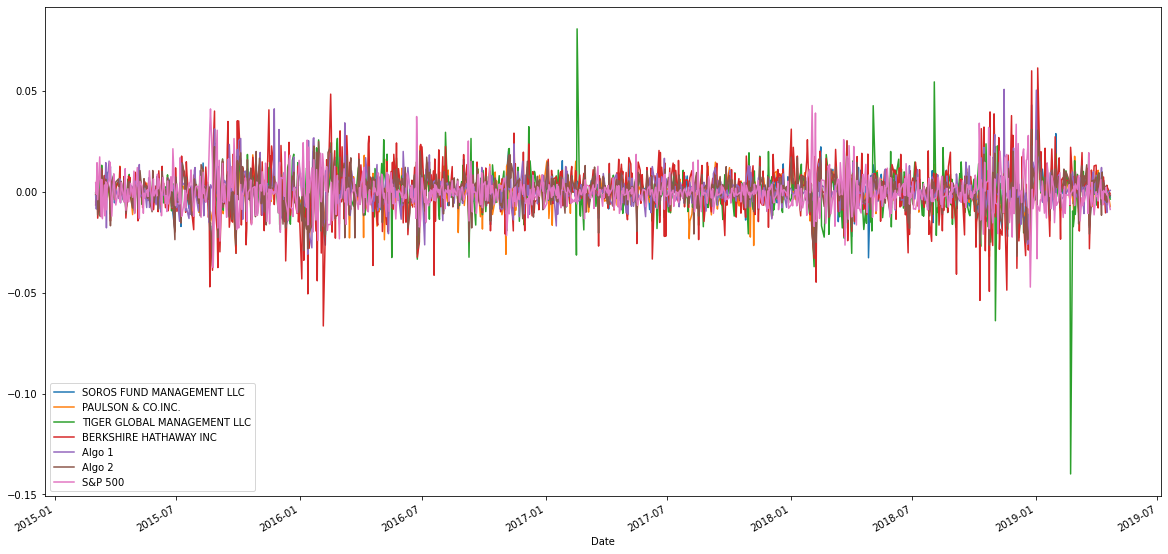

In [16]:
# Plot daily returns of all portfolios
returns_plot = combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

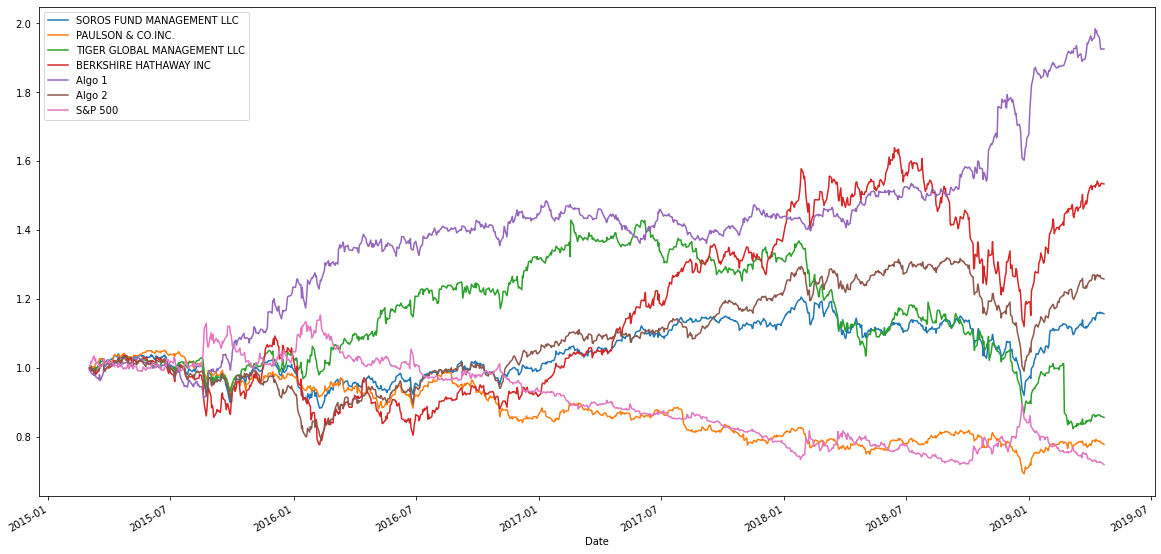

In [54]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_df).cumprod()

# Plot cumulative returns
cumulative_returns_plot = cumulative_returns.plot(figsize=(20,10))


In [49]:
# QUESTION: Does any portfolio outperform the S&P 500?
# ANSWER:

# Sort the values for cumulative returns on last day of dataset in order of descending performance
last_cumulative_returns = cumulative_returns.iloc[-1].sort_values(ascending=False)

print(f"Here's the list of portfolios in order of descending performance:")
print("")
print(last_cumulative_returns)
print("")
print(f"The S&P 500 is the worst performer for this dataset.")

Here's the list of portfolios in order of descending performance:

Algo 1                         1.925124
BERKSHIRE HATHAWAY INC         1.533046
Algo 2                         1.257151
SOROS FUND MANAGEMENT LLC      1.156280
TIGER GLOBAL MANAGEMENT LLC    0.855652
PAULSON & CO.INC.              0.776939
S&P 500                        0.718476
Name: 2019-04-22 00:00:00, dtype: float64

The S&P 500 is the worst performer for this dataset.


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


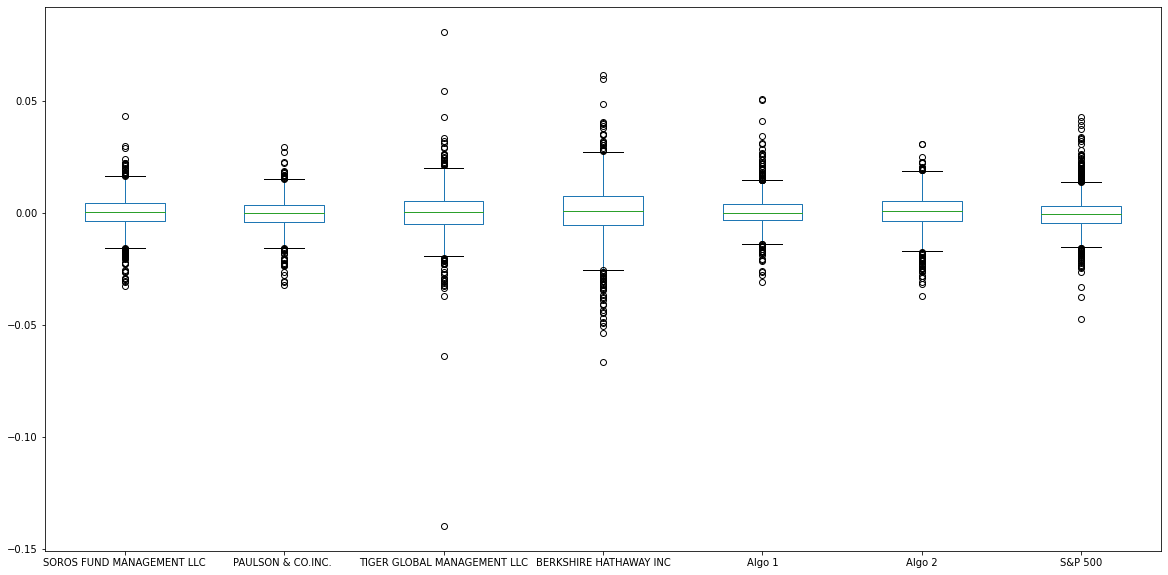

In [68]:
# Box plot to visually show risk
box_plot = combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [109]:
# Calculate the daily standard deviations of all portfolios
daily_stdv = combined_df.std()
daily_stdv = daily_stdv.sort_values(ascending=False) #sorted from most risk to least risk
daily_stdv

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [112]:
# Calculate  the daily standard deviation of S&P 500
sp500_stdv = daily_stdv["S&P 500"]

# Determine which portfolios are riskier than the S&P 500

for portfolio in range(len(daily_stdv)):  # The for loop compares the stdev of each portfolio with respect to the stdev of the S&P 500
    if daily_stdv[portfolio] > sp500_stdv:
        print(f"{daily_stdv.index[portfolio]} is riskier than the S&P 500") #by using index, I return the name of the portfolio not its value
    elif daily_stdv[portfolio] == sp500_stdv:
        pass
    else:
        print(f"{daily_stdv.index[portfolio]} is less risky than the S&P 500")

BERKSHIRE HATHAWAY INC is riskier than the S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
Algo 2 is less risky than the S&P 500
SOROS FUND MANAGEMENT LLC is less risky than the S&P 500
Algo 1 is less risky than the S&P 500
PAULSON & CO.INC.  is less risky than the S&P 500


### Calculate the Annualized Standard Deviation

In [114]:
# Calculate the annualized standard deviation (252 trading days)
annualized_stdv = daily_stdv * np.sqrt(252)
annualized_stdv

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

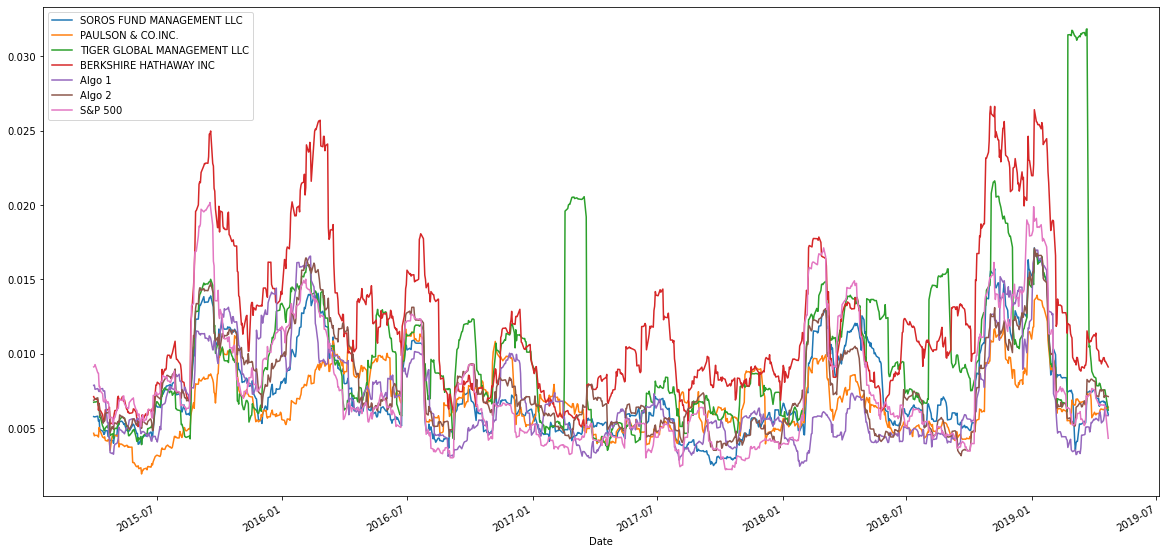

In [121]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portolio_rstdv = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_portolio_rstdv.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

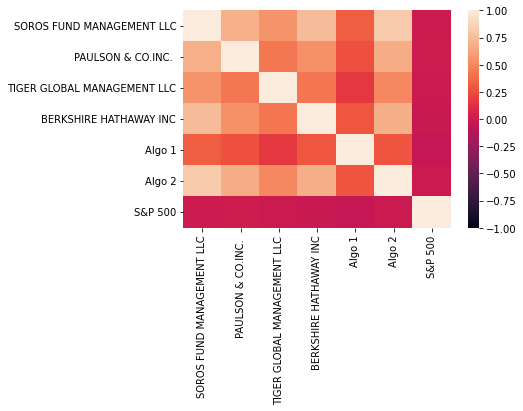

In [124]:
# Calculate the correlation
portfolios_correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

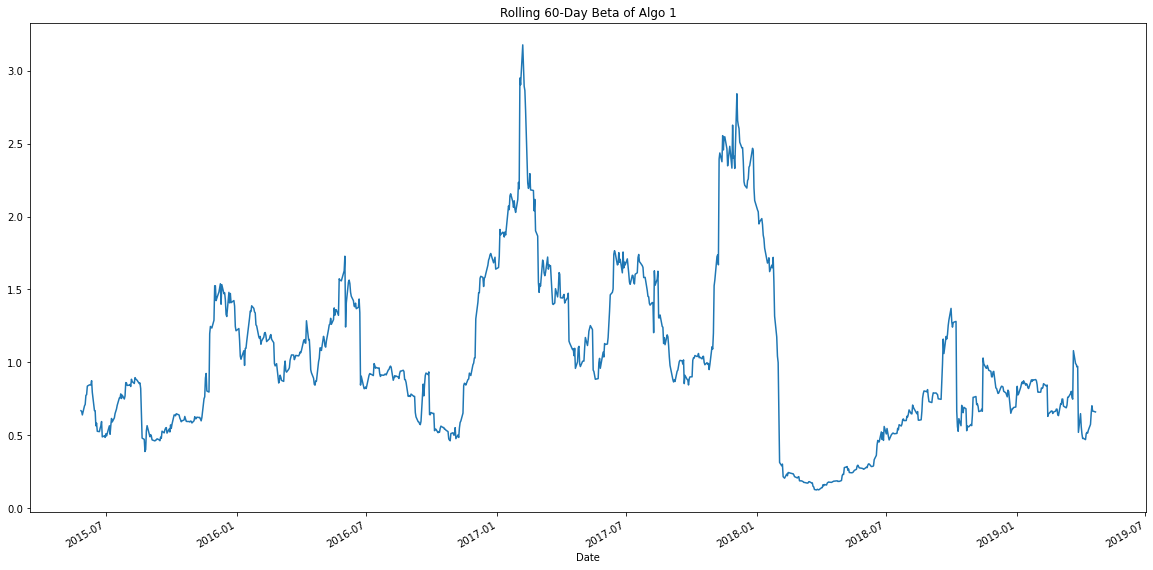

In [128]:
# Calculate covariance of a single portfolio
covariance = combined_df["Algo 1"].cov(combined_df["S&P 500"])

# Calculate variance of S&P 500
variance = combined_df['S&P 500'].var()

# Computing beta
algo1_beta = covariance / variance

# Plot beta trend 
# Calculate and plot the 60-day rolling beta between chosen portfolio and the S&P 500
rolling_covariance = combined_df['Algo 1'].rolling(window=60).var()
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

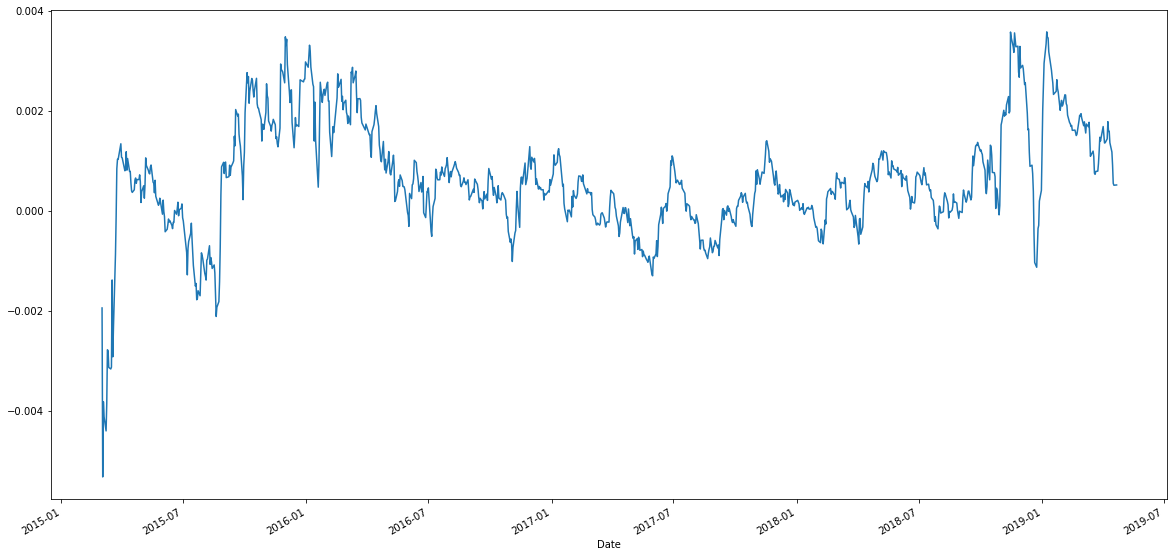

In [135]:
# Use `ewm` to calculate the rolling window
ewm21 = combined_df['Algo 1'].ewm(halflife=21).mean() #calculated for only one portfolio
ewm21.plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [136]:
# Annualized Sharpe Ratios

# Will calculate the Sharpe Ratios by computing the quotient of `annualized average return` and `annualized standard deviation` 
# This is because I have no data for the risk-free rate of return on the portfolio

sharpe_ratios = (combined_df.mean() * 252) / (annualized_stdv)
sharpe_ratios


Algo 1                         1.369589
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
PAULSON & CO.INC.             -0.491422
S&P 500                       -0.518582
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
dtype: float64

<AxesSubplot:>

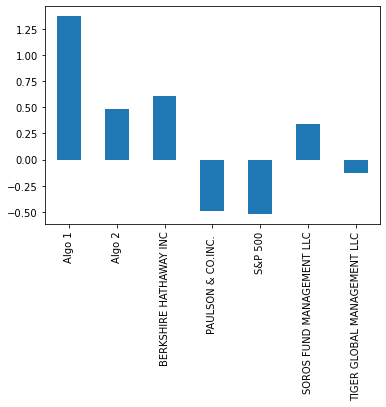

In [139]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on risk to reward,

* Algo 1 outperforms the S&P 500 and the whales portfolios

* Algo 2 outperforms the S&P 500 and the whales portfolios, except for the Berkshire Hathaway INC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [169]:
# Reading data from 1st stock

# Set the path to the CSV
aapl_path = Path('Resources/aapl_historical.csv')

# Read csv into a dataframe and display a few rows
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
aapl_df.sort_index(ascending=True,inplace=True) #sort the index
aapl_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
aapl_df.columns = ['AAPL'] # rename column
aapl_df.head()


,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [170]:
# Reading data from 2nd stock

# Set the path to the CSV
goog_path = Path('Resources/goog_historical.csv')

# Read csv into a dataframe and display a few rows
goog_df = pd.read_csv(goog_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
goog_df.sort_index(ascending=True,inplace=True) #sort the index
goog_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
goog_df.columns = ['GOOG'] # rename column
goog_df.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [171]:
# Reading data from 3rd stock

# Set the path to the CSV
cost_path = Path('Resources/cost_historical.csv')

# Read csv into a dataframe and display a few rows
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
cost_df.sort_index(ascending=True,inplace=True) #sort the index
cost_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
cost_df.columns = ['COST'] # rename column
cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [172]:
# Reading data from 4th stock
# Used Google Finance function to obtain data from ADOBE

# Set the path to the CSV
adbe_path = Path('Resources/adbe_historical.csv')

# Read csv into a dataframe and display a few rows
adbe_df = pd.read_csv(adbe_path, index_col="Date", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
adbe_df.sort_index(ascending=True,inplace=True) #sort the index
adbe_df.drop(columns=['Symbol'],inplace=True) # drop Symbol column
adbe_df.columns = ['ADBE'] # rename column
adbe_df.head()

,ADBE
Date,
2018-05-11,241.88
2018-05-14,238.37
2018-05-15,236.60
2018-05-16,237.39
2018-05-17,236.85


In [175]:
# Reading data from 5th stock
# Used Google Finance function to obtain data from Square

# Set the path to the CSV
sq_path = Path('Resources/sq_historical.csv')

# Read csv into a dataframe and display a few rows
sq_df = pd.read_csv(sq_path, index_col="Date", parse_dates=True, infer_datetime_format=True) #set the Date as a datetime index
sq_df.sort_index(ascending=True,inplace=True) #sort the index
sq_df.columns = ['SQ'] # rename column
sq_df.head()

,SQ
Date,
2018-05-11,54.73
2018-05-14,54.28
2018-05-15,54.65
2018-05-16,56.59
2018-05-17,54.82


In [194]:
# Combine all stocks in a single DataFrame

custom_df = pd.concat([aapl_df, goog_df, cost_df, adbe_df, sq_df], axis='columns', join='inner')
custom_df.index.rename('Date', inplace=True)
custom_df.head()


,AAPL,GOOG,COST,ADBE,SQ
Date,,,,,
2018-05-11,188.59,1098.26,195.76,241.88,54.73
2018-05-14,188.15,1100.20,195.88,238.37,54.28
2018-05-15,186.44,1079.23,195.48,236.60,54.65
2018-05-16,188.18,1081.77,198.71,237.39,56.59
2018-05-17,186.99,1078.59,199.60,236.85,54.82


In [195]:
# Calculate daily returns
daily_returns = custom_df.pct_change() 

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,AAPL,GOOG,COST,ADBE,SQ
Date,,,,,
2018-05-14,-0.002333,0.001766,0.000613,-0.014511,-0.008222
2018-05-15,-0.009088,-0.019060,-0.002042,-0.007425,0.006817
2018-05-16,0.009333,0.002354,0.016523,0.003339,0.035499
2018-05-17,-0.006324,-0.002940,0.004479,-0.002275,-0.031278
2018-05-18,-0.003637,-0.011339,-0.003206,0.005235,0.004013


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [196]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
custom_returns = daily_returns.dot(weights)

# Display sample data
custom_returns

Date
2018-05-14   -0.004537
2018-05-15   -0.006160
2018-05-16    0.013409
2018-05-17   -0.007667
2018-05-18   -0.001787
                ...   
2019-05-03    0.014548
2019-05-06    0.000650
2019-05-07   -0.020830
2019-05-08   -0.003965
2019-05-09   -0.004317
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [197]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns["Total"]= custom_returns
daily_returns.head()

,AAPL,GOOG,COST,ADBE,SQ,Total
Date,,,,,,
2018-05-14,-0.002333,0.001766,0.000613,-0.014511,-0.008222,-0.004537
2018-05-15,-0.009088,-0.019060,-0.002042,-0.007425,0.006817,-0.006160
2018-05-16,0.009333,0.002354,0.016523,0.003339,0.035499,0.013409
2018-05-17,-0.006324,-0.002940,0.004479,-0.002275,-0.031278,-0.007667
2018-05-18,-0.003637,-0.011339,-0.003206,0.005235,0.004013,-0.001787


In [200]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna()

,AAPL,GOOG,COST,ADBE,SQ,Total
Date,,,,,,
2018-05-14,-0.002333,0.001766,0.000613,-0.014511,-0.008222,-0.004537
2018-05-15,-0.009088,-0.019060,-0.002042,-0.007425,0.006817,-0.006160
2018-05-16,0.009333,0.002354,0.016523,0.003339,0.035499,0.013409
2018-05-17,-0.006324,-0.002940,0.004479,-0.002275,-0.031278,-0.007667
2018-05-18,-0.003637,-0.011339,-0.003206,0.005235,0.004013,-0.001787
...,...,...,...,...,...,...
2019-05-03,0.012431,0.019602,0.007953,0.021242,0.011515,0.014548
2019-05-06,-0.015443,0.003366,-0.001594,-0.006723,0.023643,0.000650
2019-05-07,-0.026957,-0.012855,-0.016583,-0.023232,-0.024522,-0.020830


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [41]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [42]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [43]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios


In [45]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!